# Data Analysis on Haberman Cancer Survival Dataset

* Survival of patients who had undergone surgery for breast cancer

* Title: Haberman's Survival Data

* Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

* Number of Instances: 306

* Number of Attributes: 4 (including the class attribute)

* Attribute Information:

 > Age of patient at time of operation
 > Patient's year of operation
 > Number of positive axillary nodes detected
 > Survival status (class attribute) 

In [58]:
import pandas as pand
import seaborn as sb
import matplotlib.pyplot as map
import numpy as np

#Read csv file into pandas dataframe

haberman = pand.read_csv("haberman.csv")

In [3]:
#Data points and Features
print (haberman.shape)

(306, 4)


In [4]:
#Column Names
print (haberman.columns)

Index(['Age', 'Oper Year', 'Axil Nodes', 'Surv Stat'], dtype='object')


In [5]:
#How many Data points for each class are present?
haberman["Surv Stat"].value_counts()

1    225
2     81
Name: Surv Stat, dtype: int64

# Observations

> There are 306 Datapoints and 4 Features present in Haberman Dataset.

> Survival Status [Surv Stat] is considered as the Output label/Response label/Class label.

> There are Two classes present in the Response label and they were representing in Numerical Form.
   
   1: The Patient Survival 5 Years or Longer
   
   2: The Patient Died with in 5 Years
    
> In the Class label, 225 Datapoints are present for Class '1' and 81 Datapoints are present for Class '2'.

In [6]:
#Lets see a sample of haberman dataset

haberman.head()

,Age,Oper Year,Axil Nodes,Surv Stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [69]:
#The dataset contains 306 datapoints and 4 features. To understand it better, we should load a sample dataset.
#From Attribute Information we know the meaning of Class labels "1" & "2"
# Instead of using numerical values, let's change the class labels to definitions
#     1 as +ve ie., Survived more than 5y
#     2 as -ve ie., Died within 5y

haberman['Surv Stat'] = haberman['Surv Stat'].map({1:"Survived more than 5y", 2:"Died within 5y"})

haberman.head()

,Age,Oper Year,Axil Nodes,Surv Stat
0,30,64,1,Survived more than 5y
1,30,62,3,Survived more than 5y
2,30,65,0,Survived more than 5y
3,31,59,2,Survived more than 5y
4,31,65,4,Survived more than 5y


In [8]:
#How many Data points for each class are present?
haberman["Surv Stat"].value_counts()

Survived more than 5y    225
Died within 5y            81
Name: Surv Stat, dtype: int64

# 3D Scatter plot

In [72]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

haberman.head()

data = []
clusters = []
colors = ['r', 'g']

for i in range(len(haberman['Name'].unique())):
    name = df['Name'].unique()[i]
    color = colors[i]
    x = haberman[ haberman['Name'] == name ]['Age']
    y = haberman[ haberman['Name'] == name ]['Oper_Year']
    z = haberman[ haberman['Name'] == name ]['Axil Nodes']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)

#url = py.plot(fig, filename='pandas-3d-iris', validate=False)

ModuleNotFoundError: No module named 'plotly'

# Source

https://seaborn.pydata.org/generated/seaborn.pairplot.html#

# PAIR-Plots

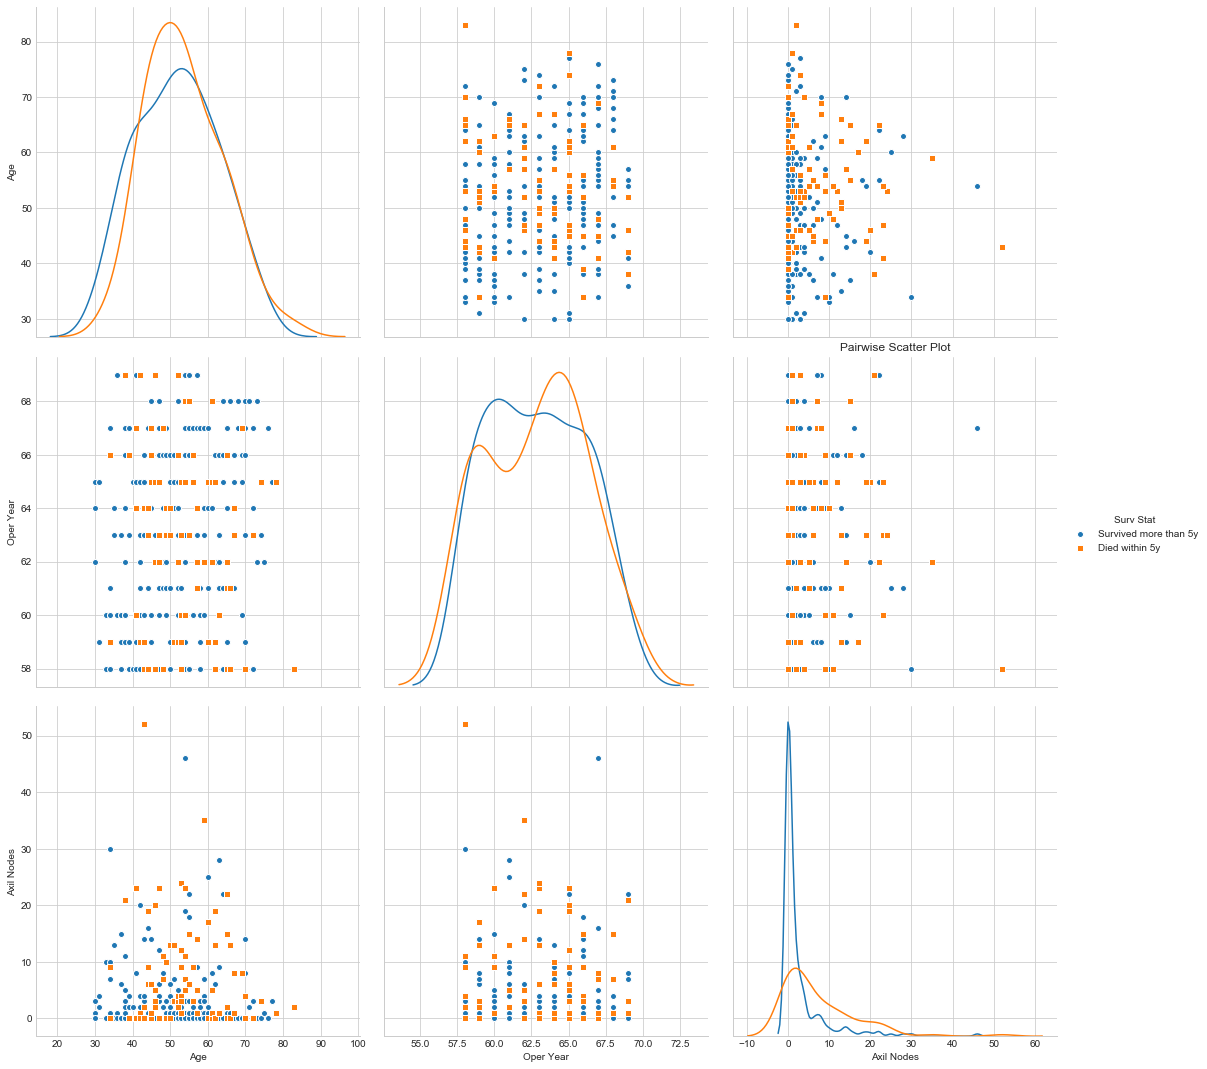

In [31]:
map.close()
sb.set_style("whitegrid");
sb.pairplot(haberman, hue="Surv Stat",vars=["Age", "Oper Year", "Axil Nodes"], size=5, diag_kind="kde",markers=["o", "s",]);
map.show()

# Observations:-
    * Here, I've applied Pair Plots for better understanding of the data. The blue coloured line mentions about the patients who survived more than 5 years and orange coloured line for those who died with in 5 years.
    * I've considered Age, Oper_Year and Axil Nodes as variable names and Survival Status as class label.
    * I've first tried to get conclusions through PDF but later KDE helped me to get better accurate result.
    * From the above plot, we can sence that the plots of attributes 'Age' and 'Axil Nodes' are good and can give better understanding when compare to the plot of attribuet 'Oper_Year'.

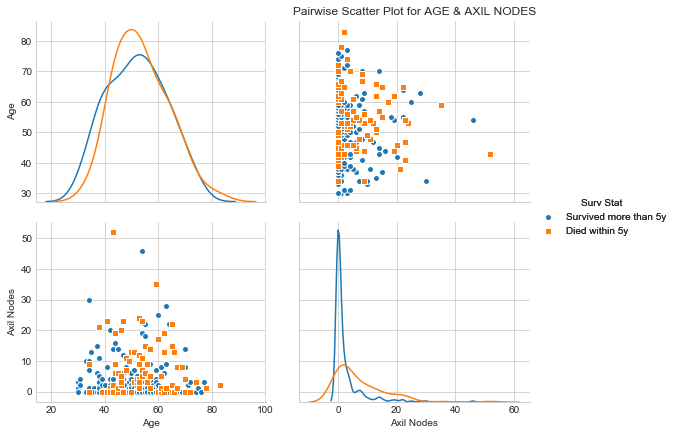

In [34]:
#Lets do pairwise scatter plot for attributes 'Age' and 'Axil Nodes'

map.close()
sb.set_style("whitegrid");
sb.pairplot(haberman, hue="Surv Stat",vars=["Age","Axil Nodes"], diag_kind = "kde", size=3, markers=["o", "s",]).add_legend();
map.title('Pairwise Scatter Plot for AGE & AXIL NODES')
map.show();

# Kernal Denstiy Estimation for Age

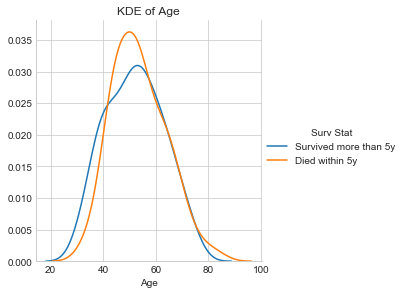

In [37]:
sb.FacetGrid(data = haberman, size = 4, hue = 'Surv Stat',).map(sb.kdeplot, 'Age').add_legend();
map.title('KDE of Age')
map.show()

# Observations:-
    * I've drawn a KDE plot on attribute Age.
    * As I can observe from the above plot, The patients whose age is in between 40 - 60 are the highest number of patients who did not survived.

# Kernal Density Estimation for Axil Nodes

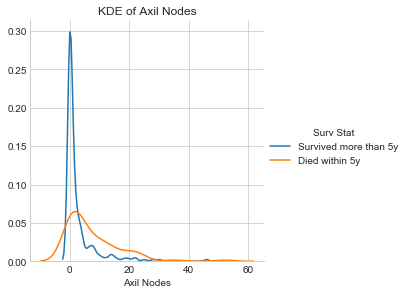

In [70]:
sb.FacetGrid(data = haberman, size = 4, hue = 'Surv Stat',).map(sb.kdeplot, 'Axil Nodes').add_legend();
map.title('KDE of Axil Nodes')
map.show()

# Observations:-
    * I've drawn a KDE plot on attribute Axil Nodes.
    * As I can observe from the above plot, The patients who had less than 10 axillary nodes are survived more than 5 years after operation.

# Box-plot - Whiskers for Axil nodes and Survival Status

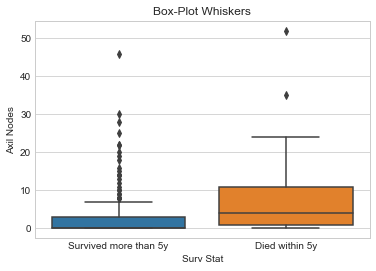

In [71]:
sb.boxplot(x='Surv Stat',y='Axil Nodes', data=haberman)
map.title('Box-Plot Whiskers')
map.show()

# Observations:-
    * Here x-axis is "Surv Stat" and y-axis is "Axil Nodes"
    * Here on 'Surv_Stat' we can see two boxes created for two values of the class label. Blue coloured box represents those patients who survived more than 5 years after the operation and orange coloured box is for those who died within 5 years.
    * In the Box-Plot, the three lines on the boxes are the percentile values , where the bottom line is  25th percentile, middle is 50th percentile and upper line represents 75th percentile.
    * Due to high Axil Node values, the axis of the plot created with a difference of 10, starting from 0 to 50. So the bottom and the middle line of the blue coloured box is not visible clearly
    * Upto 50 percentile of the orange coloured box data is equal to blue coloured box means the patients whose axil nodes count is less than 5 have survived more than 5 years after the operation.

# Conclusion

* There are more number of patients whose age is in between 40 - 60 and having more than 10 axillary nodes are died than others.

# Axilary Nodes

>Lymph nodes are responsible for filtering lymph fluid and detecting chemical changes that signal if an infection is present.
>Cancer cells can also get into the lymphatic system and get lodged in lymph nodes. When they are in the armpit, these filter points are called axillary lymph nodes.
>When cancer has spread to the axillary lymph nodes, the nodes may feel enlarged, or there may be a noticeable lump.